In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

In [2]:
#defining the features
features = ["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm", "petal_width_in_cm", "target_class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = features) #reading the dataset

In [3]:
df.head

<bound method NDFrame.head of      sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     petal_width_in_cm    target_class  
0                  0.2     Iris-setosa  
1                  0.2     Iris-setosa  
2                  0.2     Iris-setosa  
3            

In [4]:
df.shape

(150, 5)

In [5]:
df.describe

<bound method NDFrame.describe of      sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     petal_width_in_cm    target_class  
0                  0.2     Iris-setosa  
1                  0.2     Iris-setosa  
2                  0.2     Iris-setosa  
3        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   target_class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


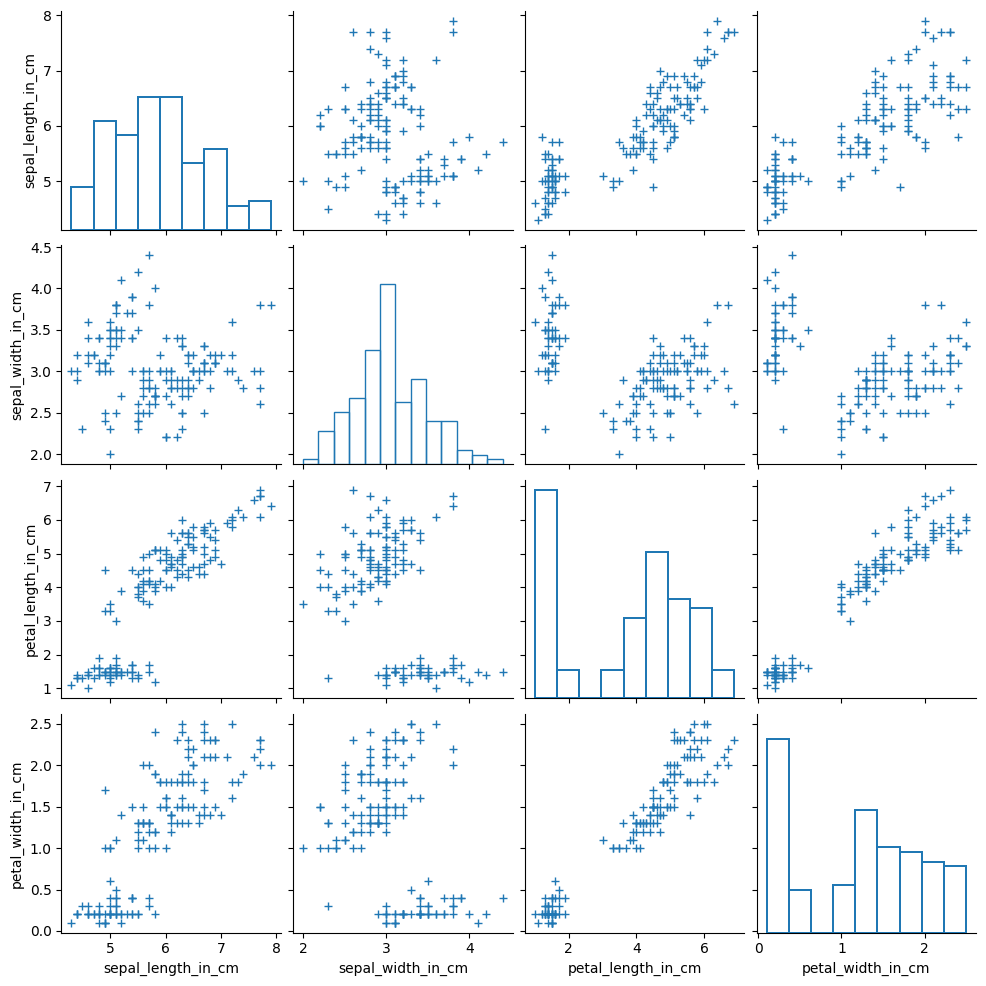

In [8]:
sns.pairplot(
    df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [9]:
TargetClass = {}
TargetClass["Iris-setosa"] = (df["target_class"] == 'Iris-setosa').sum()
TargetClass["Iris-versicolor"] = (df["target_class"] == 'Iris-versicolor').sum()
TargetClass["Iris-virginica"] = (df["target_class"] == 'Iris-virginica').sum()

print(TargetClass)

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


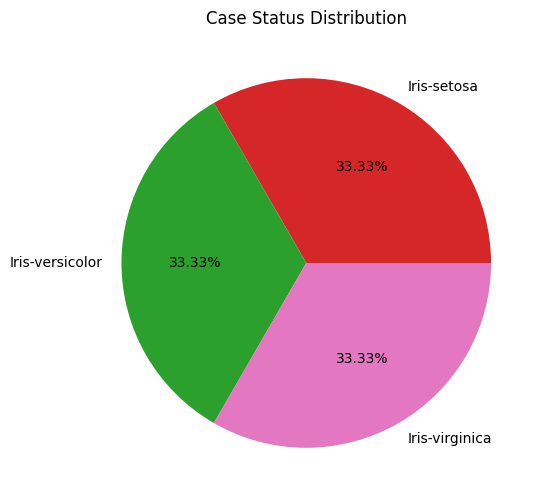

In [12]:
labels = []
count = []
colors = ['tab:red', 'tab:green', 'tab:pink'] # list of colors to use

for x, y in TargetClass.items():
    labels.append(x)
    count.append(y)


plt.figure(figsize=(6, 6))
plt.pie(count, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Case Status Distribution')
plt.show()


In [13]:
X = df.drop('target_class', axis = 1)
Y = df['target_class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )
Y_train.value_counts()

Iris-setosa        42
Iris-versicolor    41
Iris-virginica     37
Name: target_class, dtype: int64

In [14]:
X_test.shape

(30, 4)

In [15]:
X_train.shape

(120, 4)

In [16]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
Y_pred = DTC.predict(X_test)

In [17]:
print(accuracy_score(Y_test, Y_pred)*100)

96.66666666666667


In [18]:
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



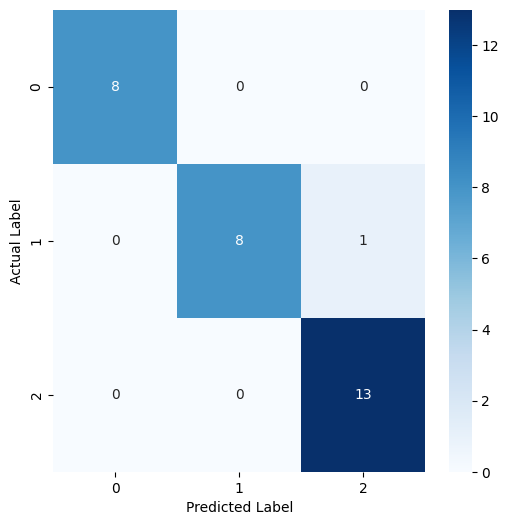

In [19]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [22]:
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

sample = np.array([[7.3, 2.8, 6.3, 1.8]])  # Prediction should be Iris-Virginica
prediction = DTC.predict(sample)[0]
encoded_prediction = class_mapping[prediction]

print("The encoded prediction is:", encoded_prediction)


The encoded prediction is: 2


C:\Users\kisha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


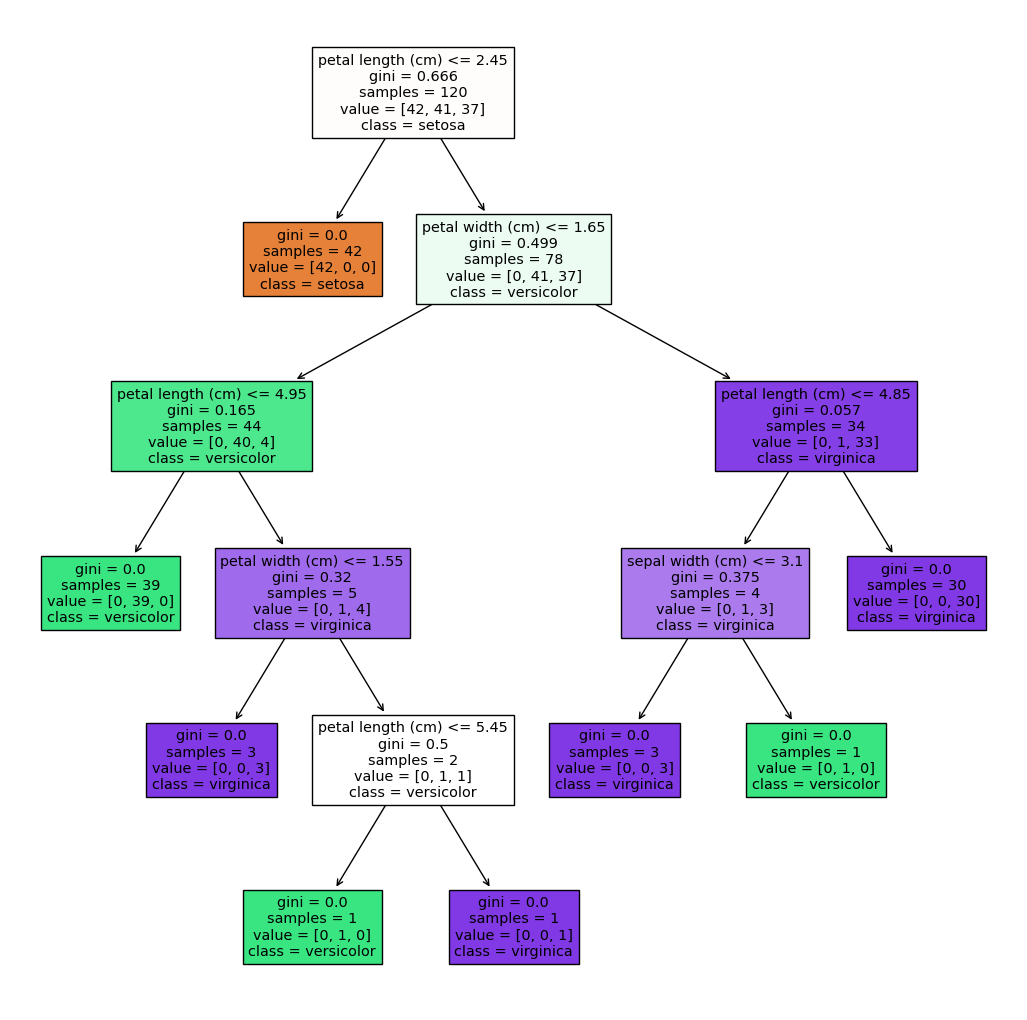

In [23]:
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (13,13))
tree.plot_tree(DTC, feature_names = features, class_names = species, filled = True);